In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 1. Load Your Dataset
train = pd.read_csv("/content/drive/MyDrive/10th Semester/EEE385/UJIndoorLoc/trainingData.csv")
test = pd.read_csv("/content/drive/MyDrive/10th Semester/EEE385/UJIndoorLoc/validationData.csv")
# 2. Print the columns of the DataFrame
print(train.columns)
print(test.columns)

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)
Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Split features and labels (adjust based on your dataset columns)
train_X = train.iloc[:, :-9]  # All columns except the last one as features
train_y = train.iloc[:, -9:-7]   # Last column as target (label)
test_X = test.iloc[:, :-9]  # All columns except the last one as features
test_y = test.iloc[:, -9:-7]   # Last column as target (label)

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)


(19937, 520)
(19937, 2)
(1111, 520)
(1111, 2)


In [ ]:
# from sklearn.preprocessing import MaxAbsScaler
# test_X = MaxAbsScaler().fit_transform(test_X)
# train_X = MaxAbsScaler().fit_transform(train_X)

from sklearn.preprocessing import StandardScaler
test_X = StandardScaler().fit_transform(test_X)
train_X = StandardScaler().fit_transform(train_X)

In [ ]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

def printPredictions(y_true,y_pred, count):
  print(f"Predictions: ")
  print(y_true.assign(
      Y1_pred = y_pred[:,0],
      Y2_pred = y_pred[:,1]
  ).head(count).to_markdown(index = False))

def showResults(y_true, y_pred, count = 5):
  print("R2 score: ",r2_score(y_true,y_pred))
  print("Root Mean squared error: ",root_mean_squared_error(y_true,y_pred))
  printPredictions(y_true,y_pred, count)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
rdf.fit(train_X,train_y)
y_pred_rdf = rdf.predict(test_X)
showResults(test_y,rdf.predict(test_X))

R2 score:  0.9567957375038152
Root Mean squared error:  18.6094818380921
Predictions: 
|   LONGITUDE |    LATITUDE |   Y1_pred |     Y2_pred |
|------------:|------------:|----------:|------------:|
|    -7515.92 | 4.86489e+06 |  -7444.99 | 4.86486e+06 |
|    -7383.87 | 4.86484e+06 |  -7394.24 | 4.86482e+06 |
|    -7374.3  | 4.86485e+06 |  -7413.38 | 4.86485e+06 |
|    -7365.82 | 4.86484e+06 |  -7439.49 | 4.86485e+06 |
|    -7641.5  | 4.86492e+06 |  -7655.64 | 4.86493e+06 |


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)
showResults(test_y,knn.predict(test_X))


R2 score:  0.9176930944331143
Root Mean squared error:  27.092979426398106
Predictions: 
|   LONGITUDE |    LATITUDE |   Y1_pred |     Y2_pred |
|------------:|------------:|----------:|------------:|
|    -7515.92 | 4.86489e+06 |  -7482.87 | 4.86491e+06 |
|    -7383.87 | 4.86484e+06 |  -7379.25 | 4.86485e+06 |
|    -7374.3  | 4.86485e+06 |  -7359.2  | 4.86484e+06 |
|    -7365.82 | 4.86484e+06 |  -7360.52 | 4.86484e+06 |
|    -7641.5  | 4.86492e+06 |  -7638.88 | 4.86491e+06 |


In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
n_feats = train_X.shape[1]
print(n_feats)

520


In [ ]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(520, activation='softmax', input_shape=(n_feats,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear')) #output layer

    # compile model
    model.compile(optimizer='adam', loss='mse')
    return model

# build the model for normalized data
model = regression_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 520)                 │         270,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          66,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 346,921 (1.32 MB)

 Trainable params: 346,921 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#fit the model
lat_train_y = train_y.iloc[:,0]

lat_test_y = test_y.iloc[:,0]

lat_history = model.fit(train_X, lat_train_y, validation_data=(test_X, lat_test_y), epochs=100, verbose=1)



Epoch 1/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 40037320.0000 - val_loss: 98232.9453
Epoch 2/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 29205.6465 - val_loss: 63078.7188
Epoch 3/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 8398.2354 - val_loss: 51064.8945
Epoch 4/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 4372.2007 - val_loss: 39806.6914
Epoch 5/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2464.7642 - val_loss: 37105.6367
Epoch 6/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2167.2920 - val_loss: 34648.5742
Epoch 7/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1201.4535 - val_loss: 33065.8398
Epoch 8/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1003.0148 - val_loss: 31272.7773
Epoch 9/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 913.1608 - val_loss: 29413.8223
Epoch 10/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1347.7512 - val_loss: 28930.0508
Epoch 11/100
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step -

In [ ]:
print("Latitude")
print("R2 score: ",r2_score(lat_test_y,model.predict(test_X)))
print("Root Mean squared error: ",root_mean_squared_error(lat_test_y,model.predict(test_X)))

Latitude
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R2 score:  0.9093254583923519
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Root Mean squared error:  36.18139790120612


In [ ]:
long_train_y = train_y.iloc[:,1]
long_test_y = test_y.iloc[:,1]
long_history = model.fit(train_X, long_train_y, validation_data=(test_X, long_test_y), epochs=300, verbose=1)


Epoch 1/300
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 23590506332160.0000 - val_loss: 19998319837184.0000
Epoch 2/300
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 15253788164096.0000 - val_loss: 2201811681280.0000
Epoch 3/300
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 955293302784.0000 - val_loss: 30438053888.0000
Epoch 4/300
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 16137975808.0000 - val_loss: 18149586944.0000
Epoch 5/300
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 7522523648.0000 - val_loss: 13706235904.0000
Epoch 6/300
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 5143592960.0000 - val_loss: 10393974784.0000
Epoch 7/300
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 3811886080.0000 - val_loss: 9478285312.0000
Epoch 8/300
624/624 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 3437527040.0000 - val_loss: 8787677184.0000
Epoch 9/300
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1509248128.0000 - val_loss: 9211105280.0000
Epoch 10/300
624/624 ━━━━━━━━━━━

In [ ]:
print("Longitude")
print("R2 score: ",r2_score(long_test_y,model.predict(test_X)))
print("Root Mean squared error: ",root_mean_squared_error(long_test_y,model.predict(test_X)))

Longitude
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R2 score:  -1289.320176127205
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Root Mean squared error:  2523.134828007519


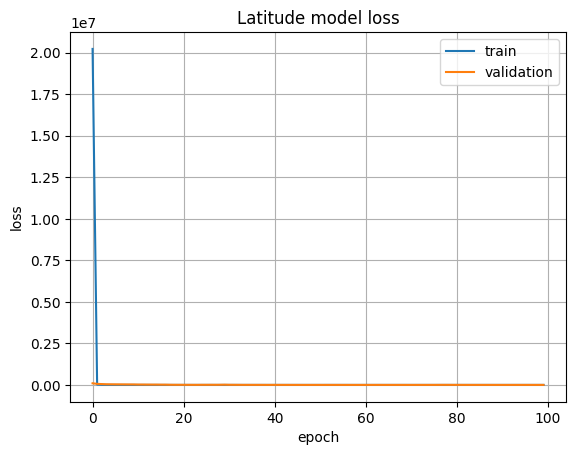

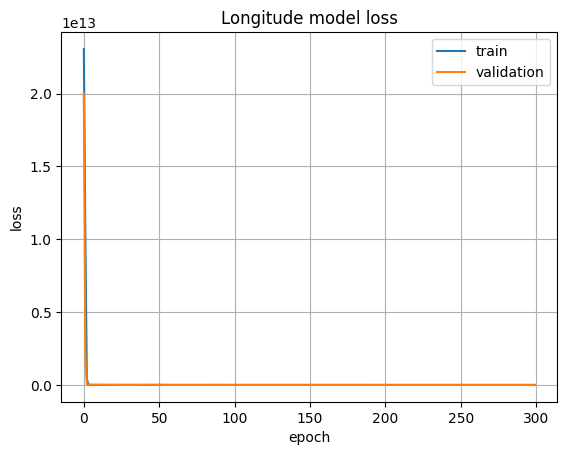

In [ ]:
import matplotlib.pyplot as plt
plt.plot(lat_history.history['loss'])
plt.plot(lat_history.history['val_loss'])
plt.title('Latitude model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
plt.plot(long_history.history['loss'])
plt.plot(long_history.history['val_loss'])
plt.title('Longitude model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
    dtrain_reg = xgb.DMatrix(train_X, train_y)
    dtest_reg = xgb.DMatrix(test_X, test_y)
  # Define hyperparameters
    params = {"objective": "reg:squarederror"}
    evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]
    n=500
    booster = xgb.train(
            params=params,
            dtrain=dtrain_reg,
            num_boost_round=n,
            evals = evals,

    )


[0]	train-rmse:1705353.89612	validation-rmse:1705401.87462
[1]	train-rmse:1193773.39725	validation-rmse:1193821.37851
[2]	train-rmse:835659.37020	validation-rmse:835707.34934
[3]	train-rmse:584973.99696	validation-rmse:585021.97589
[4]	train-rmse:409490.53107	validation-rmse:409538.51021
[5]	train-rmse:286649.52081	validation-rmse:286697.49995
[6]	train-rmse:200658.98911	validation-rmse:200706.96830
[7]	train-rmse:140464.39847	validation-rmse:140512.37769
[8]	train-rmse:98327.31953	validation-rmse:98375.29898
[9]	train-rmse:68830.75904	validation-rmse:68878.73871
[10]	train-rmse:48182.73506	validation-rmse:48230.71502
[11]	train-rmse:33728.78470	validation-rmse:33776.76505
[12]	train-rmse:23610.84240	validation-rmse:23658.82329
[13]	train-rmse:16528.05244	validation-rmse:16576.03395
[14]	train-rmse:11570.16140	validation-rmse:11618.14347
[15]	train-rmse:8099.49341	validation-rmse:8147.47606
[16]	train-rmse:5670.16780	validation-rmse:5714.12223
[17]	train-rmse:3969.73634	validation-rmse

In [ ]:
  showResults(test_y,booster.predict(dtest_reg))

R2 score:  0.13472822308540344
Root Mean squared error:  84.60468673353384
Predictions: 
|   LONGITUDE |    LATITUDE |   Y1_pred |     Y2_pred |
|------------:|------------:|----------:|------------:|
|    -7515.92 | 4.86489e+06 |  -7475.54 | 4.86482e+06 |
|    -7383.87 | 4.86484e+06 |  -7491.81 | 4.86481e+06 |
|    -7374.3  | 4.86485e+06 |  -7500.39 | 4.86481e+06 |
|    -7365.82 | 4.86484e+06 |  -7503.63 | 4.86481e+06 |
|    -7641.5  | 4.86492e+06 |  -7620.58 | 4.86486e+06 |
